# Aufgabe 1.4.1

Wir nehmen eine Rechtecks-Schwingung

\begin{equation*}
f(x)=\left\{\begin{array}{lll}
+1 & \text { für } & -\frac{1}{2} \pi \leq x \leq \frac{1}{2} \pi \\
-1 & \text { für } & \frac{1}{2} \pi \leq x \leq \frac{3}{2} \pi
\end{array}\right.
\end{equation*}

und stellen diese nun grafisch dar und berechnen zudem die Fourierreihe von $f(x)$.

In [1]:
from matplotlib import pyplot as plt
import numpy as np

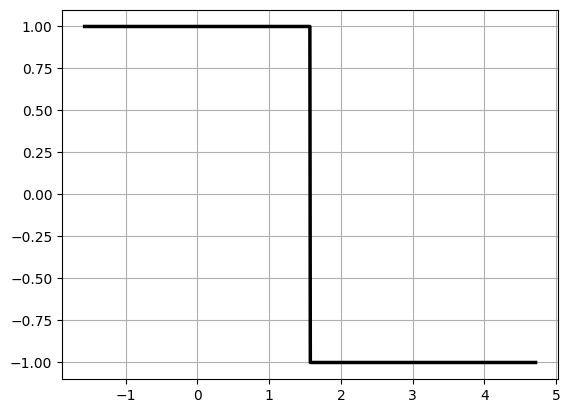

In [20]:
t = np.linspace(-1/2*np.pi, 3/2*np.pi,1000)
def f(t):
    return np.where((t >= -1/2*np.pi) & (t <= 1/2*np.pi),1,-1)

plt.plot(t,f(t),'k',lw=2.5)
plt.grid()
plt.show()

Wir wollen nun diese Rechteckfunktion $f(x)$ durch Sinus- und Cosinusfunktionen approximieren. Da die Funktion $f(x)$ gerade ist, also $f(a) = f(-a)$, wissen wir, dass wir nur eine Cosinusfunktion brauchen werden. Dies ergibt sich aus der Orthogonalität der funktion $f(x)$ und $\sin(x)$. Wir wissen also, dass wir Cosinusfunktionen verwendne können, um $f(x)$ approximieren zu können. Allerdings stellt sich die Fragen, welche Frequenz und welche Amplitude ist notwendig, um eine akkurate Annäherung zu erreichen? Die Grafik unten zeigt unterschiedliche Cosinusfunktionen mit unterschiedlichen Amplituden und Frequenzen auf. 

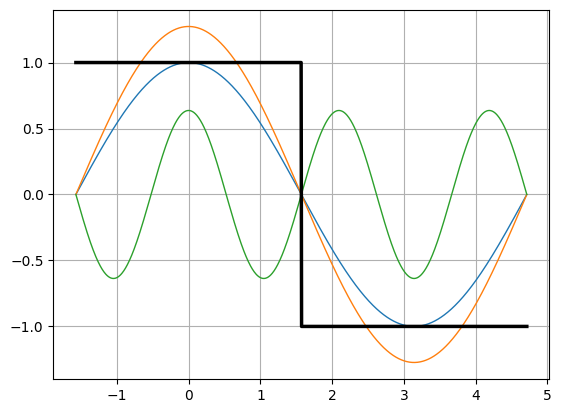

In [30]:
plt.plot(t,np.cos(t),lw=1)
plt.plot(t,4/np.pi*np.cos(t),lw=1)
plt.plot(t,2/np.pi*np.cos(3*t),lw=1)
plt.plot(t,f(t),'k',lw=2.5)
plt.grid()
plt.show()

Werden nun bspw. zwei Cosinusfunktionen mit unterschiedlicher Frequenz und Amplitude miteinander addiert, erhält man einen völlig neue Funktion:

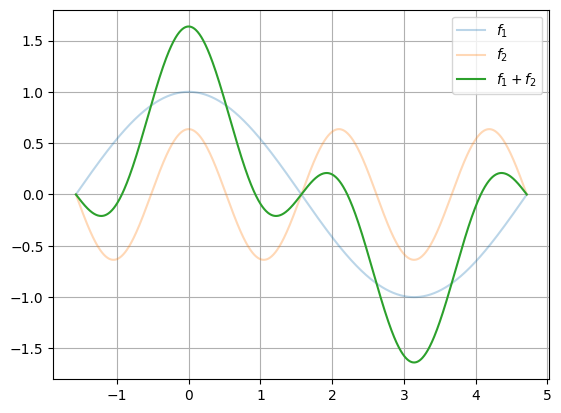

In [41]:
f1 = np.cos(t)
f2 = 2/np.pi*np.cos(3*t)
f3 = np.cos(t) + 2/np.pi*np.cos(3*t)

plt.plot(t,f1,alpha=0.3,label=f'$f_1$')
plt.plot(t,f2,alpha=0.3,label=f'$f_2$')
plt.plot(t,f3,label=f'$f_1 + f_2$')
plt.grid()
plt.legend(fontsize=10)
plt.show()

Durch das Addieren von $f_1$ und $f_2$ ist eine neue Funktion $f_3$ entstanden. So ist naheliegend, dass die schwarze Rechtecksfunktion $f(x)$ von oben auf die selbe Art und Weise approximiert werden kann. Durch das Addieren von 3 Cosinusfunktionen (mit spezifischen Amplituden und Frequenzen) kann folgende Funktion erstellt werden

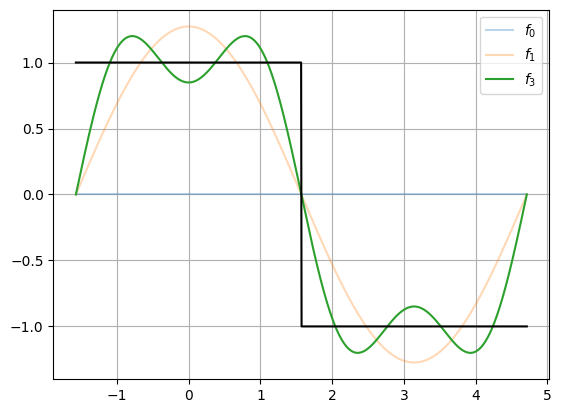

In [68]:
a1 = 4/np.pi
a3 = -4/(3*np.pi)
fourier0 = np.zeros_like(t)
fourier1 = fourier0 + a1*np.cos(1*t)
fourier3 = fourier1 + a3*np.cos(3*t)

plt.plot(t,fourier0,alpha=0.3, label=f'$f_0$')
plt.plot(t,fourier1,alpha=0.3, label=f'$f_1$')
plt.plot(t,fourier3, label=f'$f_3$')
plt.plot(t,f(t),'k')
plt.grid()
plt.legend(fontsize=10)
plt.show()

Die grüne Funktion $f_3$ nimmt bereits die Form der schwarzen Rechtecksfunktion $f(x)$ an. Es wird sofort ersichtlich, dass durch das Hinzufügen von weiteren Cosinustermen unterschiedlicher Frequenz und Amplitude wir noch näher an die schwarze Funktion $f(x)$ kommen können:

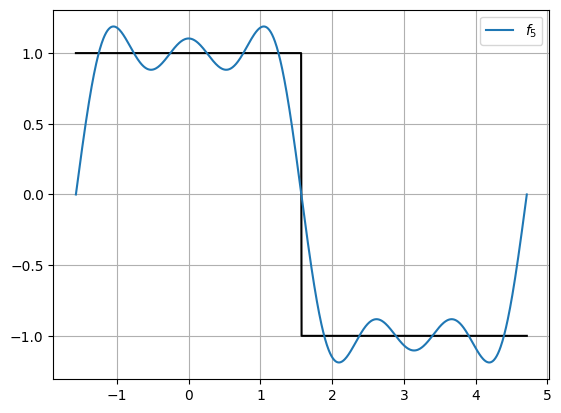

a1 = 1.2732395447351628
a3 = -0.4244131815783876
a5 = 0.25464790894703254


In [74]:
a5 = 4*1/(5*np.pi)
fourier5 = fourier3 + a5*np.cos(5*t)

plt.plot(t,f(t),'k')
plt.plot(t,fourier5,label=f'$f_5$')
plt.grid()
plt.legend(fontsize=10)
plt.show()

print(f'a1 = {a1}')
print(f'a3 = {a3}')
print(f'a5 = {a5}')

Mit diesem Beispiel kann die Fourierreihe einfach motiviert werden. Die Fourierreihe ist daher gegeben 

\begin{equation*}
f(x) \approx \frac{a_0}{2} + \sum_{k=1}^{\infty}a_k \cos \left(k\frac{2\pi}{T}x\right) + b_k \sin \left(k\frac{2\pi}{T}x\right).
\end{equation*}

Wir sehen, dass es für jede Cosinus- und Sinusfunktion einen spezifischen Koeffizienten gibt, $a_k$ und $b_k$. Diese Koeffizienten müssen berechnet werden, damit wir wissen, wie die jeweiligen Cosinusfunktionen skaliert werden müssen, um miteinander addiert sie im besten Fall die schwarze Funktion approximieren. Diese Fourierkoeffizienten werden berechnet als

\begin{equation*}
a_k = \frac{2}{T} \int_{0}^{T} f(x)\cos\left(k\frac{2\pi}{T}x\right)\mathrm{d}x, \quad \text{für} \quad k \geq 1
\end{equation*}

\begin{equation*}
b_k = \frac{2}{T} \int_{0}^{T} f(x)\sin\left(k\frac{2\pi}{T}x\right)\mathrm{d}x, \quad \text{für} \quad k \geq 1
\end{equation*}

und

\begin{equation*}
a_0 = \frac{2}{T} \int_{0}^{T} f(x)\,\mathrm{d}x.
\end{equation*}

Weil die schwarze Rechteckfunktion eine symmetrische, gerade Funktion ist, ist das innere Produkt $<f(x),\sin(x)> = 0$ und daher können wir die Koeffizienten $b_k$ ignorieren, und nur die Koeffizienten $a_k$ berechnen. Gegeben Aufgabe 1.4.1, 

In [67]:
from scipy.integrate import quad

# Define the function f(x)
def f(x):
    return np.where((x >= -np.pi/2) & (x < np.pi/2), 1, -1)
T = 2*np.pi

# Function to calculate Fourier coefficients
def calculate_coefficient(k, func):
    integrand = lambda x: func(x) * np.cos(k*(2*np.pi/T)*x)
    result, _ = quad(integrand, -np.pi/2, 3*np.pi/2)
    return (2/T)*result

# Calculate a0 and a_n for n = 1, 2, 3
a0, _ = quad(lambda x: f(x), -np.pi/2, 3*np.pi/2)
a0 /= np.pi

a1 = calculate_coefficient(1, f)
a2 = calculate_coefficient(2, f)
a3 = calculate_coefficient(3, f)
a4 = calculate_coefficient(4, f)
a5 = calculate_coefficient(5, f)

# Display the coefficients
print(f"a0: {a0}")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"a3: {a3}")
print(f"a4: {a4}")
print(f"a5: {a5}")


a0: 0.0
a1: 1.2732395447351628
a2: 1.249000902703301e-16
a3: -0.42441318157838737
a4: -4.85722573273506e-17
a5: 0.25464790894703243


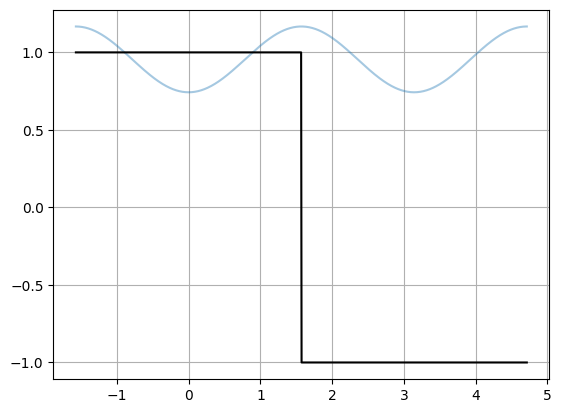

In [26]:
def fourier(t):
    out = a0/np.pi
    for n in range(nr_coeff-1):
        out += a_n[n]*np.cos(n*t)
    return out

plt.plot(t,fourier(t),alpha=0.4)
plt.plot(t,f(t),'k')
plt.grid()
plt.show()

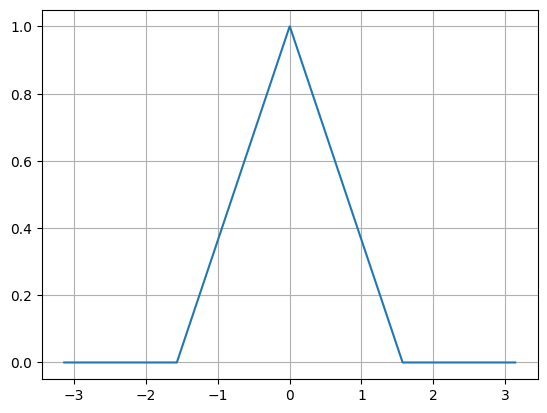

In [44]:
dx = 0.001
L = np.pi
x = L*np.arange(-1+dx,1+dx,dx)
n = len(x)
# divide domain into 4 quarters
nquart = int(np.floor(n/4)) #500 if n = 2000

f = np.zeros_like(x)
# f[0:nquart] = 0
f[nquart:2*nquart] = np.arange(1,nquart+1) * 4/n
f[2*nquart:3*nquart] = np.ones(nquart) - 4/n*np.arange(0,nquart)
# f[-nquart:] = 0

plt.plot(x,f)
plt.grid()
plt.show()

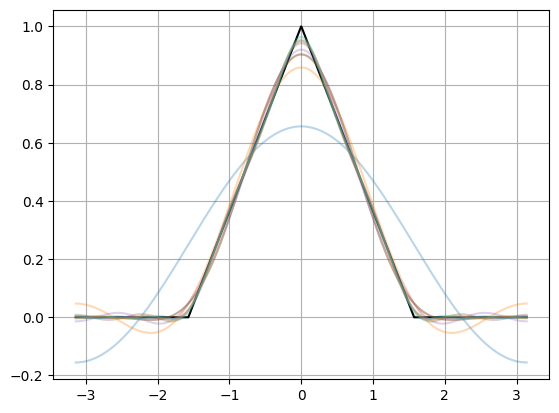

In [79]:
a0 = np.sum(f * np.ones_like(x))*dx
fourier = a0/2

nr_terms = 20
a = np.zeros(nr_terms)
b = np.zeros(nr_terms)
plt.plot(x,f,'k')
for k in range(nr_terms):
    a[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L))*dx #inner product
    b[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L))*dx
    fourier = fourier + a[k]*np.cos((k+1)*np.pi*x/L) + b[k]*np.sin((k+1)*np.pi*x/L)
    if k < 10:
        plt.plot(x,fourier,alpha=0.3)
# plt.plot(x,fourier)
plt.grid()
plt.show()

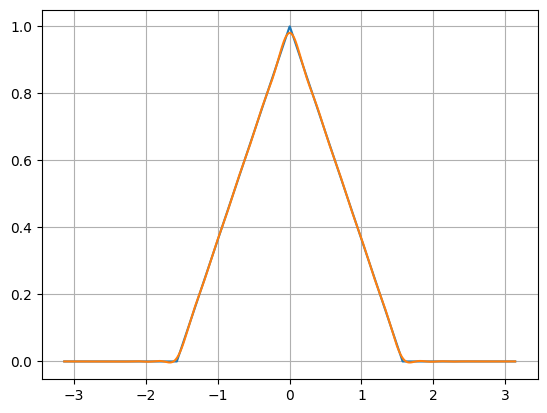

In [80]:
plt.plot(x,f)
plt.plot(x,fourier)
plt.grid()
plt.show()

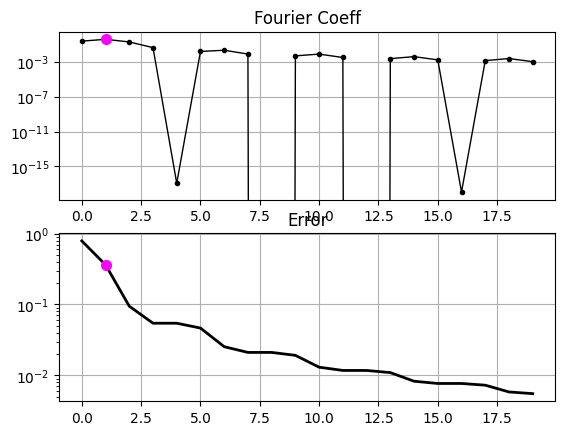

In [109]:
# plot amplitudes

fourier = a0/2 * np.ones_like(f)
kmax = 20
a = np.zeros(kmax)
b = np.zeros(kmax)
err = np.zeros(kmax)

a[0] = a0/2
err[0] = np.linalg.norm(f-fourier)/np.linalg.norm(f)

for k in range(1,kmax):
    a[k] = np.sum(f*np.cos(np.pi*k*x/L))*dx
    b[k] = np.sum(f*np.sin(np.pi*k*x/L))*dx
    fourier = fourier + a[k]*np.cos(k*np.pi*x/L) + b[k]*np.sin(k*np.pi*x/L)
    err[k] = np.linalg.norm(f-fourier)/np.linalg.norm(f)

thresh = np.median(err) * np.sqrt(kmax) * 4/np.sqrt(3)
r = np.max(np.where(err > thresh))

fig, ax = plt.subplots(2,1)
ax[0].semilogy(np.arange(kmax),a,'.-k',lw=1)
ax[0].semilogy(r,a[r],'o',color='magenta',markersize=7)
plt.sca(ax[0])
plt.grid()
plt.title('Fourier Coeff')

ax[1].semilogy(np.arange(kmax),err,'k',lw=2)
ax[1].semilogy(r,err[r],'o',color='magenta',markersize=7)
plt.sca(ax[1])
plt.grid()
plt.title('Error')

plt.show()

due to some simmetry, we see every fourth coeff drops down to 0